<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Beata/LSTM1_smog_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import math
import sklearn
import keras
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans

In [ ]:
link = "https://drive.google.com/file/d/1gwPP5TlL0zYHDkSjowfnR0DU8rsj1bTd/view?usp=sharing"
link_id = link.split("/")[-2]
!gdown --id $link_id
!unzip smog1.zip

Downloading...
From: https://drive.google.com/uc?id=1gwPP5TlL0zYHDkSjowfnR0DU8rsj1bTd
To: /content/smog1.zip
2.39MB [00:00, 76.7MB/s]
Archive:  smog1.zip
  inflating: april-2017.csv          
  inflating: august-2017.csv         
  inflating: december-2017.csv       
  inflating: february-2017.csv       
  inflating: january-2017.csv        
  inflating: july-2017.csv           
  inflating: june-2017.csv           
  inflating: march-2017.csv          
  inflating: may-2017.csv            
  inflating: november-2017.csv       
  inflating: october-2017.csv        
  inflating: sensor_locations.csv    
  inflating: september-2017.csv      


In [ ]:
jan = pd.read_csv('january-2017.csv')
feb = pd.read_csv('february-2017.csv')
mar = pd.read_csv('march-2017.csv')
apr = pd.read_csv('april-2017.csv')
may = pd.read_csv('may-2017.csv')
jun = pd.read_csv('june-2017.csv')
jul = pd.read_csv('july-2017.csv')
aug = pd.read_csv('august-2017.csv')
sep = pd.read_csv('september-2017.csv')
octo = pd.read_csv('october-2017.csv')
nov = pd.read_csv('november-2017.csv')
dec = pd.read_csv('december-2017.csv')

In [ ]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

In [ ]:
year.shape

(8593, 337)

In [ ]:
year.head(3)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sensors = pd.read_csv("sensor_locations.csv")

In [ ]:
year["UTC time"] = pd.to_datetime(year["UTC time"], format="%Y-%m-%dT%H:%M:%S")


In [ ]:
year.head(3)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
year.shape

(8593, 337)

In [ ]:
year = year.set_index("UTC time")

In [ ]:
year.head(1)

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,147.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2= year.groupby(year.columns.str.split('_').str[0], axis=1)

In [ ]:
new_df = pd.DataFrame()

In [ ]:
for i in df2:
  old = i[1].columns
  new = i[1].columns.str.split("_").str[1]
  zmiana = { k:v  for k,v in zip(old,new)}
  i[1].rename(columns=zmiana,inplace=True)
  i[1]["id"] = i[0]
  new_df = new_df.append(i[1])

In [ ]:
new_df

,temperature,humidity,pressure,pm1,pm25,pm10,id
UTC time,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
...,...,...,...,...,...,...,...
2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895
2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895
2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895


In [ ]:
new_df["id"] = new_df["id"].astype(int)
sensors["id"] = sensors["id"].astype(int)

In [ ]:
new_df = new_df.reset_index()
new_df.head()

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140


In [ ]:
geo_df = new_df.merge(sensors, how='left', on='id')
geo_df

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
...,...,...,...,...,...,...,...,...,...,...
481203,2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895,50.084966,19.877998
481204,2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895,50.084966,19.877998
481205,2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895,50.084966,19.877998
481206,2017-12-24 23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895,50.084966,19.877998


In [ ]:
from numpy import nan
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
geo_df.head(1)

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374


In [ ]:
geo_df.isnull().sum()

UTC time            0
temperature    109558
humidity       109638
pressure       172529
pm1             92854
pm25            92835
pm10            92832
id                  0
latitude            0
longitude           0
dtype: int64

In [ ]:
# PUNKT 7
# 7.1 REGRESJA LINIOWA

In [ ]:
# PIERWSZA PROBA MODELOWANIA REGRESJA LINIOWA.
# BEZ USUWANIA NAN, BEZ USREDNIANIA NAN, BEZ UWZGLEDNIANIA CZASU. TYLKO MONITORING I WSPOLRZEDNE DO PREDYKCJI

In [ ]:
geo_df = geo_df.replace({nan:0})

In [ ]:
X = geo_df[['temperature', 'humidity', 'pressure', 'latitude', 'longitude' ]]
y = geo_df['pm10']


In [ ]:
X = X.values

In [ ]:
y = y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

In [ ]:


linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = linear_regression.predict(X_test)

In [ ]:
y_pred

array([ 36.27827405,  64.94619771,  32.67470927, ..., -11.00975079,
       -11.29744028,  28.43380237])

In [ ]:
id=1
linear_regression_prediction = linear_regression.predict(X_test[id,:].reshape(1,-1))

In [ ]:
print("Model predicted for  {0} value {1}".format(id, linear_regression_prediction))

Model predicted for  1 value [64.94619771]


In [ ]:
print("Real value for  \"{0}\" is {1}".format(id, y_test[id]))

Real value for  "1" is 25.0


In [ ]:
# WNIOSKI: MODEL POMYLIL SIE O PONAD 50%

In [ ]:
print('Coefficients of a learned model: \n', linear_regression.coef_)

Coefficients of a learned model: 
 [-2.25229025e+00  6.10121588e-03  3.42436750e-04 -3.38278297e+01
  4.03833159e+01]


In [ ]:
linear_regression_predictions = linear_regression.predict(X_test)
print(linear_regression_predictions)

[ 36.27827405  64.94619771  32.67470927 ... -11.00975079 -11.29744028
  28.43380237]


In [ ]:
# EWALUACJA MODELU

In [ ]:
from sklearn.metrics import mean_squared_error
print("Mean squared error of a learned model: %.2f" % 
      mean_squared_error(y_test, linear_regression.predict(X_test)))

Mean squared error of a learned model: 2270.00


In [ ]:
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, linear_regression.predict(X_test)))

Variance score: 0.18


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, cv=4)
print(scores)

[  0.11402681 -22.65645845   0.25334255   0.16230449]


PUNKT 7.3 RNN

PUNKT 7.3.1.LSTM

In [ ]:
geo_df

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374
1,2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374
2,2017-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374
3,2017-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374
4,2017-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374
...,...,...,...,...,...,...,...,...,...,...
481203,2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895,50.084966,19.877998
481204,2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895,50.084966,19.877998
481205,2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895,50.084966,19.877998
481206,2017-12-24 23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895,50.084966,19.877998


In [ ]:
float_data = geo_df.drop(['UTC time'], axis=1)

In [ ]:
float_data

,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,-0.821052,0.051634,-1.141784,-0.834477,-0.740727,-0.800080,-2.486857,-0.264656,0.371199
1,-0.821052,0.051634,-1.141784,-0.834477,-0.740727,-0.800080,-2.486857,-0.264656,0.371199
2,-0.821052,0.051634,-1.141784,-0.834477,-0.740727,-0.800080,-2.486857,-0.264656,0.371199
3,-0.821052,0.051634,-1.141784,-0.834477,-0.740727,-0.800080,-2.486857,-0.264656,0.371199
4,-0.821052,0.051634,-1.141784,-0.834477,-0.740727,-0.800080,-2.486857,-0.264656,0.371199
...,...,...,...,...,...,...,...,...,...
481203,-0.222500,0.210328,0.878339,-0.426026,-0.323996,-0.313098,50.798755,0.973142,-1.113051
481204,-0.222500,0.210328,0.879173,-0.457445,-0.379560,-0.369289,50.798755,0.973142,-1.113051
481205,-0.222500,0.204727,0.879153,-0.520283,-0.407342,-0.406749,50.798755,0.973142,-1.113051
481206,-0.222500,0.210328,0.879113,-0.520283,-0.407342,-0.406749,50.798755,0.973142,-1.113051


In [ ]:
float_data1 = float_data.values

In [ ]:
#  jest 481 tyś wierszy. Podzial: 200 tys wierszy na train_gen, 100 tys wierszy na val_gen, pozostale 181.208 wierszy na test_gen

Cel: Przewidywanie stężenia pyłu pm10 na 24h do przodu
Na podstawie danych sprzed 24h do tyłu
steps = 1 bo jedna obserwacja na godzine
lookback = 24 bo 24h do tylu patrzymy
delay = 24 bo prognozujemy 24h do przodu

Wartosci z monitoringu wyrażone sa w innej skali (wartości temperatury wahają się od –20 do +30, a ciśnienie atmosferyczne jest wyrażane w milibarach i przyjmuje wartości oscylujące wokół 1000, wartosci pyłu w ppm i oscyluja wokoł....). Dlatego każdą z mierzonych wielkości poddano normalizacji w sposób niezależny. Dzięki temu będą one przyjmowały małe wartości z podobnych zakresów.

In [ ]:
mean = float_data1[:200000].mean(axis=0)
float_data1 -= mean
std = float_data1[:200000].std(axis=0)
float_data1 /= std

In [ ]:
# OBLICZENIE ODCHYLENIA STANDARDOWEGO DLA KOMUMNY PM10

In [ ]:
pm10 = geo_df['pm10']
std = pm10.std()
# std = 52,53

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=1):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][5]
        yield samples, targets

In [ ]:
lookback = 24
step = 1
delay = 24
batch_size = 128

train_gen = generator(float_data1,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data1,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data1,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [ ]:
# Liczba kroków pobierania danych z obiektu val_gen 
# zapewniających przetworzenie całego walidacyjnego zbioru danych.
val_steps = (300000 - 200001 - lookback) // batch_size

# Liczba kroków pobierania danych z obiektu test_gen, 
# przy której przetworzony zostanie cały testowy zbiór danych.
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [ ]:
def evaluate_naive_method():
    batch_maes = []
    for step in range(val_steps):
        samples, targets = next(val_gen)
        preds = samples[:, -1, 1]
        mae = np.mean(np.abs(preds - targets))
        batch_maes.append(mae)
    print(np.mean(batch_maes))
    # print(samples)
    
evaluate_naive_method()

0.706204177558389


Uzyskano wartość równą 0,70.  Uzyskana średnia bezwzględna wartość błędu odpowiada wartosci 36,7ppm (0,70 x pm10_std = 36,7). To bardzo duża średnia wartość błędu. WYDAJE MI SIE ZE TO ODCHYLENIE STANDARDOWE JEST BARDZO DUZE I MUSZA BYC JAKIES WARTOSCI ODSTAJACE NO I WARTOSC ODCHYLENIA STANDARDOWEGO BARDZO ZWIEKSZAJA ZERA  W DANYCH. DO TYCH ANALIZ ALBO TRZEBA USUNAC ZERA ALBO JE USREDNIC

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 8s 15ms/step - loss: 0.4798 - val_loss: 0.4041
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 0.4210 - val_loss: 0.4264
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.4076 - val_loss: 0.4207
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.4066 - val_loss: 0.4454
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.4006 - val_loss: 0.3907
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3907 - val_loss: 0.3743
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3902 - val_loss: 0.3685
Epoch 8/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3819 - val_loss: 0.3863
Epoch 9/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3849 - val_loss: 0.3716
Epoch 10/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3880 - val_lo

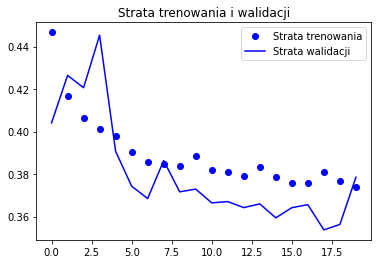

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

Znacząco pokonaliśmy zdefiniowany wcześniej klasyfikator logiczny 0,7 będący naszym punktem odniesienia. Udowodniliśmy sensowność korzystania z uczenia maszynowego, a także wyższość w tego typu zadaniach sieci rekurencyjnych nad gęstymi sieciami spłaszczającymi sekwencje.

Uzyskaliśmy średnią bezwzględna wartość błędu na poziomie ~0,4 (zanim model zaczął ulegać znacznemu przeuczeniu), co odpowiada średniej pomyłce o 0,4 X 52,52 = 21PPM. To wyraźna poprawa względem uzyskanej wcześniej wartości 36 PPM.


PUNKT 7.3.2. GRU

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
500/500 [==============================] - 36s 16ms/step - loss: 0.4375 - val_loss: 0.3840
Epoch 2/20
500/500 [==============================] - 7s 15ms/step - loss: 0.3995 - val_loss: 0.3789
Epoch 3/20
500/500 [==============================] - 7s 15ms/step - loss: 0.3884 - val_loss: 0.3733
Epoch 4/20
500/500 [==============================] - 7s 15ms/step - loss: 0.3810 - val_loss: 0.3786
Epoch 5/20
500/500 [==============================] - 7s 15ms/step - loss: 0.3810 - val_loss: 0.3746
Epoch 6/20
500/500 [==============================] - 7s 15ms/step - loss: 0.3794 - val_loss: 0.3743
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 0.3800 - val_loss: 0.3733
Epoch 8/20
500/500 [==============================] - 7s 15ms/step - loss: 0.3727 - val_loss: 0.3650
Epoch 9/20
500/500 [==============================] - 8s 15ms/step - loss: 0.3691 - val_loss: 0.3714
Epoch 10/20
500/500 [==============================] - 7s 15ms/step - loss: 0.3662 - val_l

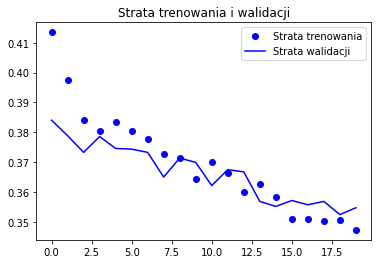

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

WNIOSKI: FUNKCJA STRATY DLA WALODACJI I TRENOWANIA JEST ZBLIZONA, NIE DOCHODZI DO ZBYTNIEGO PRZEUCZENIA

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
500/500 [==============================] - 65s 124ms/step - loss: 0.4443 - val_loss: 0.3928
Epoch 2/40
500/500 [==============================] - 62s 124ms/step - loss: 0.4254 - val_loss: 0.3779
Epoch 3/40
500/500 [==============================] - 61s 123ms/step - loss: 0.4062 - val_loss: 0.3715
Epoch 4/40
500/500 [==============================] - 61s 123ms/step - loss: 0.3980 - val_loss: 0.3647
Epoch 5/40
500/500 [==============================] - 61s 123ms/step - loss: 0.3925 - val_loss: 0.3624
Epoch 6/40
500/500 [==============================] - 61s 122ms/step - loss: 0.3970 - val_loss: 0.3597
Epoch 7/40
500/500 [==============================] - 61s 123ms/step - loss: 0.3839 - val_loss: 0.3662
Epoch 8/40
500/500 [==============================] - 62s 123ms/step - loss: 0.3882 - val_loss: 0.3582
Epoch 9/40
500/500 [==============================] - 62s 124ms/step - loss: 0.3826 - val_loss: 0.3550
Epoch 10/40
500/500 [==============================] - 62s 124ms/step - l

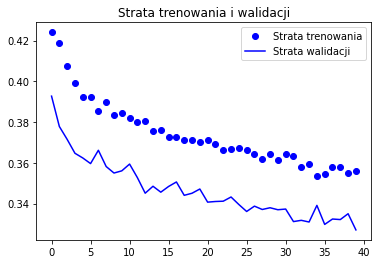

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()